[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [761]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df0 = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
df0 = df0.drop('Unnamed: 0', axis=1)
df0.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9483,103,101,963,389,123,20744,139,36,955,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,27468,207,155,335,227,178,8611,78,91,103,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,13976,86,78,176,152,83,22792,92,97,1010,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,19449,178,104,467,270,157,29418,123,92,289,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,17209,258,103,979,314,211,16713,76,42,1126,...,24023,30096,222,255081,23154,58,159671,189,2022,disease


In [762]:
labels = np.reshape(df0.Class.to_numpy(), (82,1))
# labels

# Preprocessing

In [763]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scl = StandardScaler().fit(df0.iloc[:, :-1])
stand = scl.transform(df0.iloc[:, :-1])
# stand
df = pd.DataFrame(stand, columns = df0.columns[:-1])
df = pd.concat([df, df0.iloc[:, -1]], axis=1)
df

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.315982,-0.191139,-0.314134,0.900240,0.209300,-0.666017,0.727863,-0.138580,-0.400194,-0.055432,...,0.523924,1.937765,-0.418593,0.378001,-1.016102,-0.694224,1.877948,-0.534297,0.632746,disease
1,0.702901,-0.166243,1.106687,-0.833770,-0.534704,-0.188475,-0.953771,-0.224592,-0.167457,-1.295085,...,-0.898525,0.312181,-0.180562,-0.527748,-1.243045,0.992711,-0.343225,-0.079396,-0.254870,disease
2,-0.811626,-0.195209,-0.919298,-1.272795,-0.879151,-1.013320,1.011716,-0.204851,-0.142067,0.024593,...,0.829649,-0.382834,-0.027542,-1.025622,-0.233142,1.023383,-0.795165,-0.269384,-0.882696,disease
3,-0.197261,-0.173185,-0.235199,-0.469297,-0.337221,-0.370810,1.930079,-0.161140,-0.163225,-1.024456,...,-1.106561,-0.713525,-0.424260,-0.484832,-0.477333,0.501966,-0.577998,-0.349661,-0.615033,disease
4,-0.448710,-0.154034,-0.261511,0.944419,-0.135146,0.098050,0.169166,-0.227412,-0.374804,0.193372,...,0.013588,-0.444125,0.003629,0.378170,0.762636,-0.847582,1.973716,-0.440641,1.896271,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.442585,-0.171749,1.080375,-0.532803,-0.925077,0.384575,0.725645,-0.262663,-0.010889,-1.174321,...,0.980799,0.230176,-0.302411,0.036487,0.046360,-0.878254,0.141430,-0.272060,-0.398542,control
78,0.333923,-0.181803,0.580457,0.411514,-0.539297,-0.466318,-0.665899,-0.244333,-0.302867,-1.328550,...,-0.029896,-0.827457,-0.313746,1.706386,1.559041,-0.755568,0.646188,0.014261,-0.109230,control
79,0.296543,-0.187548,-1.261347,-1.394286,0.039373,0.818703,-0.750583,-0.275354,-0.315562,-0.183471,...,0.944910,0.161091,-0.177728,1.258252,0.298428,-0.295494,-1.364001,0.265794,0.433967,control
80,-0.825994,-0.192575,-1.261347,0.673825,0.461894,-0.674700,-0.086412,-0.228822,0.306480,0.161362,...,-1.340508,-1.637365,5.540680,1.202207,-0.008101,0.685996,-0.599248,2.933659,-0.026569,control


# Student's   t-Test

In [764]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [765]:
from scipy import stats

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. 

In [766]:
stats.levene(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

LeveneResult(statistic=0.9232842255878864, pvalue=0.33950937635055467)

The test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. Next to test the assumption of normality. This can be done visually with a histogram and/or as a q-q plot, and by using the Shapiro-Wilk test which is the stats.shaprio() method. First, I will check them visually.

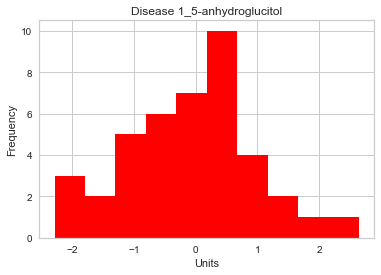

In [767]:
disease['1_5-anhydroglucitol'].plot(kind="hist", title="Disease 1_5-anhydroglucitol", color='red')
plt.xlabel("Units")
plt.savefig('disease_1_5-anhydroglucitol.JPG')

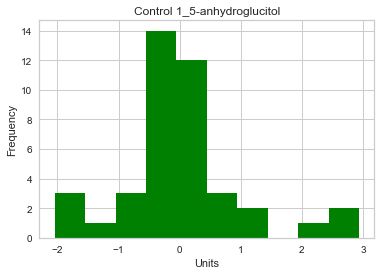

In [768]:
control['1_5-anhydroglucitol'].plot(kind='hist', title='Control 1_5-anhydroglucitol', color='green')
plt.xlabel("Units")
plt.savefig('control_1_5-anhydroglucitol.JPG')

From the looks of the histogram, each variable appears to be fairly normally distributed. Let’s see how it looks on a q-q plot, it’s easier to get a sense of normality visualizing the data as q-q plot. If you are unfamiliar with reading a q-q plot, the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.

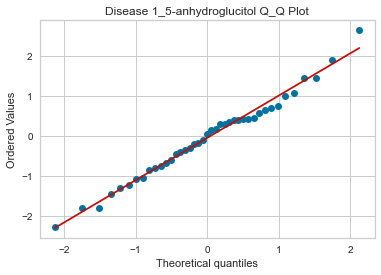

In [769]:
stats.probplot(disease['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Disease 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('disease_1_5-anhydroglucitol_qqplot.JPG')

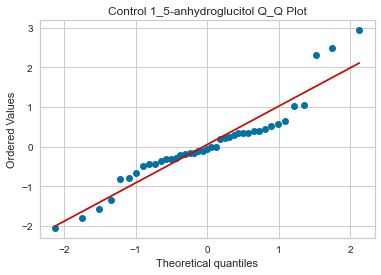

In [770]:
stats.probplot(control['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Control 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('control_1_5-anhydroglucitol_qqplot.JPG')

There is some deviation from normality in the Control q-q plot, but it does not appear to be a large violation. In all, the data looks to have normality. To be sure, we can test it statistically using the Shapiro-Wilk test for normality. The first value is the W test statistic and the second value is the p-value.

In [771]:
stats.shapiro(disease['1_5-anhydroglucitol'])

ShapiroResult(statistic=0.9895635843276978, pvalue=0.9660769701004028)

In [772]:
stats.shapiro(control['1_5-anhydroglucitol'])

ShapiroResult(statistic=0.9127679467201233, pvalue=0.0040376451797783375)

Neither of the tests for normality we significant meaning neither of the variables violates the assumption of normality. We can continue as planned(Independent t-test).

In [773]:
stats.ttest_ind(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

Ttest_indResult(statistic=-0.46223621312996305, pvalue=0.6451666190665317)

In [774]:
def test(feature):
    l_test = stats.levene(disease[feature], control[feature])
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    t_test, t_test_p = stats.ttest_ind(disease[feature], control[feature])
    k_test, k_test_p = stats.kruskal(disease[feature], control[feature])
    return feature, l_test, disease_shapiro, control_shapiro, t_test, t_test_p, k_test, k_test_p

In [775]:
df.columns[0]

'1_5-anhydroglucitol'

In [776]:
result = []
for i in range(1, 158):
    result.append(test(df.columns[i]))

In [777]:
result_df = pd.DataFrame(result, columns=['Metabolics', 'Levene test', 'Disease', 'Control', 't-Test', 'p-value(t)', 'Kruskal-Wallis', 'p-value(k)'])
# result_df.to_csv('test_plasma.csv')
result_df

,Metabolics,Levene test,Disease,Control,t-Test,p-value(t),Kruskal-Wallis,p-value(k)
0,1-monostearin,"(2.614251637045106, 0.10984420325840032)","(0.287780225276947, 7.504350331248577e-13)","(0.9605392813682556, 0.1642741858959198)",1.607087,0.111975,0.246231,0.619742
1,2_3-dihydroxybutanoic acid NIST,"(0.006478335067887287, 0.9360500705169275)","(0.937421977519989, 0.02565603516995907)","(0.9520213007926941, 0.08242102712392807)",0.687948,0.493476,0.182043,0.669623
2,2_4-diaminobutyric acid,"(0.09694042032074676, 0.7563425132995316)","(0.9051264524459839, 0.002357517834752798)","(0.9194269776344299, 0.006540666334331036)",0.683553,0.496233,0.458353,0.498395
3,2-deoxyerythritol,"(0.9084069671879833, 0.343408402153335)","(0.8347311615943909, 3.2259136787615716e-05)","(0.9222153425216675, 0.008035030215978622)",0.540504,0.590351,0.005505,0.940855
4,2-deoxytetronic acid,"(3.5970312354382075, 0.06149239892748534)","(0.8763459920883179, 0.00035684084286913276)","(0.8303760886192322, 2.5558121706126258e-05)",1.808795,0.074240,1.734516,0.187835
...,...,...,...,...,...,...,...,...
152,uric acid,"(0.13186210687409833, 0.7174668378397271)","(0.9512421488761902, 0.0773795023560524)","(0.9740688800811768, 0.4632870554924011)",-2.925388,0.004475,8.345484,0.003866
153,uridine,"(0.03291118965337513, 0.8565011579184116)","(0.9404267072677612, 0.03250748664140701)","(0.9610065221786499, 0.170563742518425)",-0.013382,0.989356,0.001377,0.970404
154,valine,"(0.35458054850656984, 0.5532124135196688)","(0.9560146331787109, 0.11394292861223221)","(0.9369757175445557, 0.024774545803666115)",-0.845800,0.400187,1.167313,0.279954
155,xylitol,"(0.3129396598445397, 0.57744470642991)","(0.5075222253799438, 1.5187914814696057e-10)","(0.5687038898468018, 8.869149303869506e-10)",-0.609977,0.543606,0.210767,0.646167


In [778]:
metabolics = result_df[(result_df['p-value(t)'] < 0.01) | (result_df['p-value(k)'] < 0.01)].loc[:, 'Metabolics']
metabolics = metabolics.to_numpy()
len(metabolics)

29

Now we keep the data of these metabolics only, from main dataset.

In [779]:
final_df = df.loc[:, metabolics]
final_df = pd.concat([final_df, df.loc[:, 'Class']], axis=1)
# final_df.to_csv('plasma(Specific Metabolics).csv')
final_df

,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,adenosine-5-monophosphate,alpha-ketoglutarate,asparagine,aspartic acid,benzoic acid,citrulline,glutamine,...,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,quinic acid,taurine,threonine,tryptophan,uric acid,Class
0,-0.493834,-0.853596,1.043546,-0.318017,0.512135,-0.384776,0.022548,-1.305536,-0.326638,-0.190839,...,-0.099283,0.034358,-0.273237,1.375625,-0.736481,0.414720,-0.427479,0.523924,-1.016102,disease
1,0.922548,-0.821435,-0.680015,-0.544047,-0.392098,0.947427,0.395145,-0.462690,0.687196,1.044991,...,0.216627,-0.830514,-0.405431,0.290328,-0.798081,-0.157190,-0.635903,-0.898525,-1.243045,disease
2,0.186030,-0.351887,0.141279,1.581370,0.353377,0.692741,0.184241,-0.487775,-0.563638,0.355438,...,0.984663,0.021254,0.950369,-0.192526,-0.313905,0.829635,-1.071862,0.829649,-0.233142,disease
3,0.327668,-0.744249,-0.552772,0.050194,-0.751031,0.349894,-0.350049,1.682051,-0.994847,1.152050,...,0.687592,-0.188412,-0.592977,-0.663066,-0.815329,1.246152,-0.625712,-1.106561,-0.477333,disease
4,0.596780,0.992437,0.112360,0.057486,-0.143607,0.297651,0.012003,-1.197672,0.766196,-0.305898,...,-0.273178,0.322649,0.521378,-0.094013,2.417442,0.075899,0.458198,0.013588,0.762636,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.890421,-0.287565,-0.784123,-0.795598,-0.295463,0.771106,-0.821068,-0.628249,0.078237,1.063280,...,-0.678933,-0.450494,-0.956782,-0.116747,-0.184545,-0.373459,0.186074,0.980799,0.046360,control
78,0.355996,-0.197515,0.095009,-0.412804,-0.640590,-0.427224,-0.733191,-1.057197,-0.408930,-0.134892,...,0.791929,-0.424286,-0.221161,-0.514587,-0.732785,-0.233285,0.678852,-0.029896,1.559041,control
79,-0.465506,-0.081736,-0.749420,-0.810180,0.781335,-0.103969,-0.522287,1.496424,0.914321,1.465637,...,-0.444175,-0.240828,-0.666904,-0.357819,0.226944,-0.544071,-1.008418,0.944910,0.298428,control
80,-0.777110,-0.795707,-0.506502,-0.722685,-0.136704,-1.220668,-0.673435,0.896900,-1.169305,-1.386388,...,-0.180434,-0.437390,-0.918180,-0.103486,-0.820257,-1.054304,1.107677,-1.340508,-0.008101,control


# Heatmap

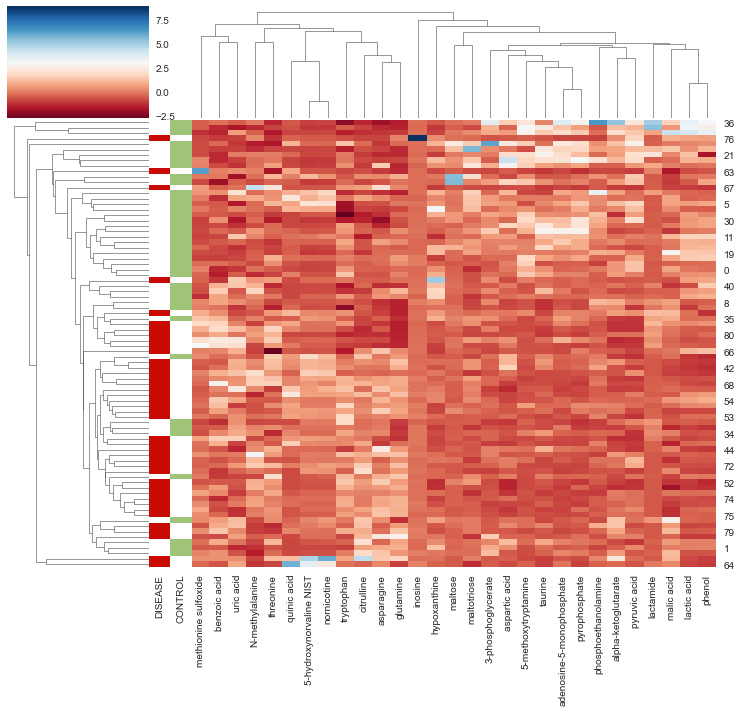

In [780]:
# Data set
import seaborn as sns
final_df1 = final_df.copy()
Class = final_df.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(final_df, cmap='RdBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=1)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
plt.savefig('clustermap_plasma.JPG')
plt.show()

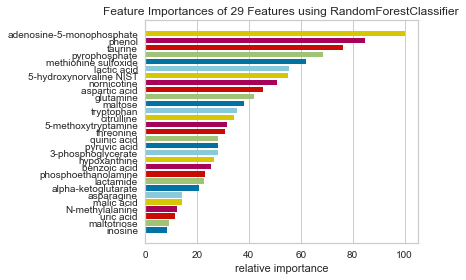

<AxesSubplot:title={'center':'Feature Importances of 29 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [781]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = final_df1.drop('Class', axis=1)
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=29)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()